In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data=pd.read_csv("C:/Users/gumus/veriproje/train.csv")

In [35]:
data.head()  # İlk 5 satırı gösterir


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [37]:
data.shape #9800 satı 18 sütun olduğu bilgisini bize verir

(9800, 18)

In [39]:
#veri seti üzerindeki sayısal değişkeneleri verir
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [41]:
data.columns #sütun isimlerini bize verir


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [43]:
#gereksiz verielri silmek için
df=data.drop(["Row ID","Order ID","Customer ID","Product ID"], axis=1)

In [45]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [47]:
data.isnull().sum() #eksik veri varsa ne kadar olduğunu gösterir

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [49]:
#postal code deki boş verileri görmek için
df[df["Postal Code"].isnull()]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [51]:
#postal code boş olduğu için 
df["Postal Code"]=df["Postal Code"].fillna(5402) #5402 yi berlingtonun posta koduna bakarak yazdık 
#burada boş veriye ne yazılması gerektiği kısmın yazmış olduk
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [53]:
#verinin dolduğunu görmek için tekrardan bu kodu çalıştırırız
df.isnull().sum() #soçtaki gibi eksik veriyi doldurmuş olduk

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [55]:
df[df["City"]=="Burlington"] #şehir olan burlingtonu gösterir eklediğimiz 5204 görülebilir burada

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
683,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,26/12/2018,01/01/2019,Standard Class,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Newell 336,23.968
1039,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Staples in misc. colors,28.728
1393,03/07/2018,04/07/2018,First Class,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,5402.0,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,19/10/2018,26/10/2018,Standard Class,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


In [57]:
#ay verisini çekmek için
df["Month"]=df["Order Date"].str[3:5]
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,06
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,05
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,01
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,01
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,01


In [59]:
df["Month"]=df["Month"].astype("int32") #inte dödü veriler başındaki sıfırlar silinmiş olud-ndu
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,5
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,1
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,1
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,1


In [61]:
#ayları isimlere dönüştür
d={1:"Ocak",2:"Şubat",3:"Mart",4:"Nisan",5:"Mayıs",6:"Haziran",7:"Temmuz",8:"Ağustos",9:"Eylül",10:"Ekim",11:"Kasım",12:"Aralık"}

In [63]:
d

{1: 'Ocak',
 2: 'Şubat',
 3: 'Mart',
 4: 'Nisan',
 5: 'Mayıs',
 6: 'Haziran',
 7: 'Temmuz',
 8: 'Ağustos',
 9: 'Eylül',
 10: 'Ekim',
 11: 'Kasım',
 12: 'Aralık'}

In [65]:
df["Month"]=[d[i] for i in df["Month"]]
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Kasım
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Kasım
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Haziran
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Ekim
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Ekim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Mayıs
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Ocak
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,Ocak
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Ocak


In [67]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Kasım
1,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Kasım
2,2017-06-12,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Haziran
3,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Ekim
4,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Ekim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Mayıs
9796,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Ocak
9797,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,Ocak
9798,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Ocak


In [69]:
#yıl verisini çekmek için 
df["Year"]=df["Order Date"].dt.year
df
#ayların yanına yıl bilgisini de yazmış olduk

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Kasım,2017
1,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Kasım,2017
2,2017-06-12,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Haziran,2017
3,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Ekim,2016
4,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Ekim,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Mayıs,2017
9796,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Ocak,2016
9797,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,Ocak,2016
9798,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Ocak,2016


In [71]:
#hangi yılda ne kadar veri var
df["Year"].value_counts()

Year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

In [73]:
#hangi ayda ne kadar satış olduğ 
df["Month"].value_counts()

Month
Kasım      1449
Aralık     1382
Eylül      1354
Ekim        809
Mayıs       725
Temmuz      697
Ağustos     693
Haziran     691
Mart        680
Nisan       657
Ocak        366
Şubat       297
Name: count, dtype: int64

In [75]:
#satış mıktarını vermek için totalda ne kadar alışveriş yaptığını görmek için
months_df = df.groupby("Month").sum(numeric_only=True)
months_df

,Postal Code,Sales,Year
Month,,,
Aralık,79735933.0,321480.1695,2787094
Ağustos,39887477.0,157315.9270,1397545
Ekim,46963820.0,199496.2947,1631565
Eylül,71845070.0,300103.4117,2730652
Haziran,37001159.0,145837.5233,1393591
Kasım,79477024.0,350161.7110,2922156
Mart,37422279.0,197573.5872,1371361
Mayıs,39303261.0,154086.7237,1462180
Nisan,34472176.0,136283.0006,1324950


In [88]:
#sadece aylarda sales verisini getirir
months_df=months_df[["Sales"]]
months_df


,Sales
Month,
Aralık,321480.1695
Ağustos,157315.9270
Ekim,199496.2947
Eylül,300103.4117
Haziran,145837.5233
Kasım,350161.7110
Mart,197573.5872
Mayıs,154086.7237
Nisan,136283.0006


In [94]:
#öncekinde veriyi index olarak gördüğü için ayırdık 
months_df.reset_index(inplace=True)
months_df


,index,Month,Sales
0,0,Aralık,321480.1695
1,1,Ağustos,157315.9270
2,2,Ekim,199496.2947
3,3,Eylül,300103.4117
4,4,Haziran,145837.5233
5,5,Kasım,350161.7110
6,6,Mart,197573.5872
7,7,Mayıs,154086.7237
8,8,Nisan,136283.0006
9,9,Ocak,94291.6296


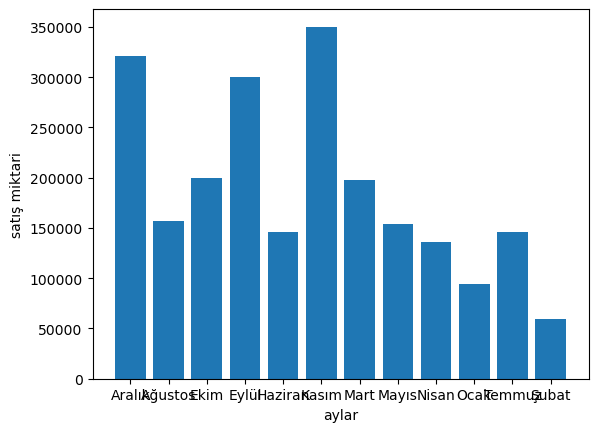

In [104]:
#satış tutarını görselleştirmek için
plt.bar(months_df['Month'], months_df["Sales"])
#daha düzenli için
plt.xlabel("aylar")
plt.ylabel("satış miktari")
plt.show()

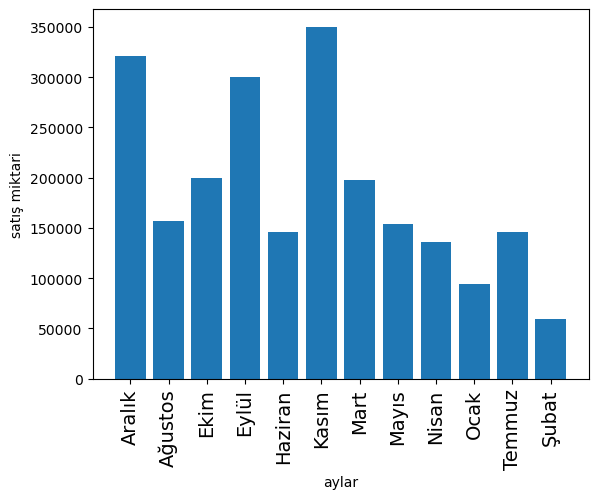

In [106]:
#satış tutarını görselleştirmek için
plt.bar(months_df['Month'], months_df["Sales"])
#daha düzenli için
plt.xlabel("aylar")
plt.ylabel("satış miktari")
plt.xticks(fontsize=14, rotation=90) #daha düzenli sıralamak için
plt.show()

In [145]:
#yıllara göre yapmak için
df["Year"].value_counts()

Year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

In [160]:
#satış mıktarını vermek için totalda ne kadar alışveriş yaptığını görmek için
year_df = df.groupby("Year").sum(numeric_only=True)
year_df=year_df[["Sales"]]
year_df

,Sales
Year,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192


In [162]:
#sadece aylarda sales verisini getirir
year_df=year_df[["Sales"]]
year_df

,Sales
Year,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192


In [164]:
#öncekinde veriyi index olarak gördüğü için ayırdık 
year_df.reset_index(inplace=True)
year_df


,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


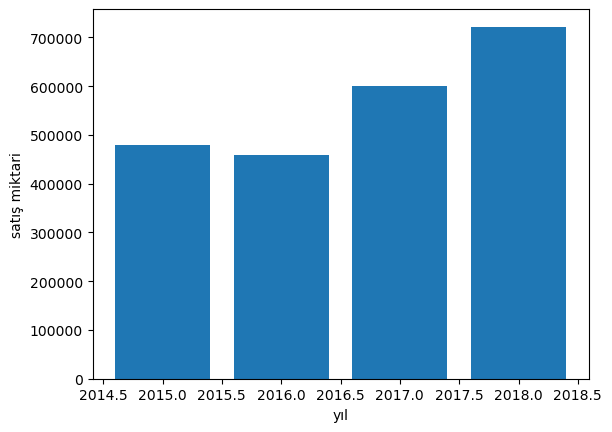

In [166]:
#satış tutarını görselleştirmek için
plt.bar(year_df['Year'], year_df["Sales"])
#daha düzenli için
plt.xlabel("yıl")
plt.ylabel("satış miktari")
plt.show()

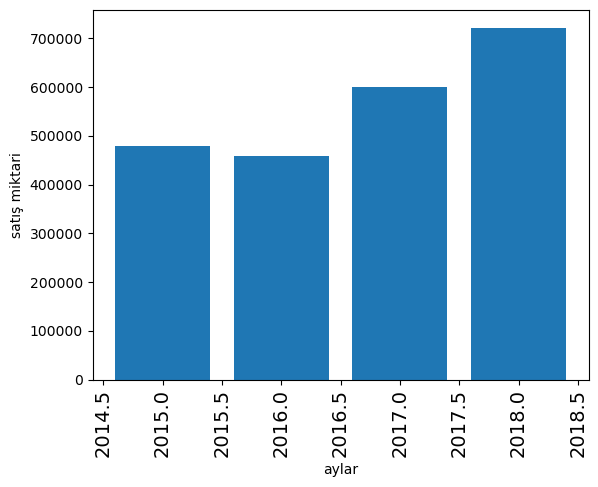

In [168]:
#satış tutarını görselleştirmek için
plt.bar(year_df['Year'],year_df["Sales"])
#daha düzenli için
plt.xlabel("aylar")
plt.ylabel("satış miktari")
plt.xticks(fontsize=14, rotation=90) #daha düzenli sıralamak için
plt.show()

In [171]:
#en çok hangi müşteri para harcamış
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Kasım,2017
1,2017-11-08,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Kasım,2017
2,2017-06-12,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Haziran,2017
3,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Ekim,2016
4,2016-10-11,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Ekim,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Mayıs,2017
9796,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Ocak,2016
9797,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,Ocak,2016
9798,2016-01-12,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Ocak,2016


In [244]:
#satış mıktarını vermek için totalda ne kadar alışveriş yaptığını görmek için
customer_df = df.groupby("Customer Name").sum(numeric_only=True).sort_values("Sales", ascending=False)
customer_df.drop(["Postal Code","Year"], axis=1, inplace=True)#ascending büyükten küçüğe sıralamak için
customer_df

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
...,...
Mitch Gastineau,16.739
Carl Jackson,16.520
Sung Chung,14.112


In [246]:
#öncekinde veriyi index olarak gördüğü için ayırdık 
customer_df.reset_index(inplace=True)
customer_df

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
...,...,...
788,Mitch Gastineau,16.739
789,Carl Jackson,16.520
790,Sung Chung,14.112
791,Lela Donovan,5.304


In [249]:
customer_df.reset_index(inplace=True)
customer_df

,index,Customer Name,Sales
0,0,Sean Miller,25043.050
1,1,Tamara Chand,19052.218
2,2,Raymond Buch,15117.339
3,3,Tom Ashbrook,14595.620
4,4,Adrian Barton,14473.571
...,...,...,...
788,788,Mitch Gastineau,16.739
789,789,Carl Jackson,16.520
790,790,Sung Chung,14.112
791,791,Lela Donovan,5.304


In [257]:
#ilk 20 tanesini görüp görüntülemk için ise
customer_df=customer_df.head(20)
#baştaki değişkeni yazma sebebimiz grafikte daha düzenli göstermesi için aksi halde x ekseninde kötü görünüm oluşmakta

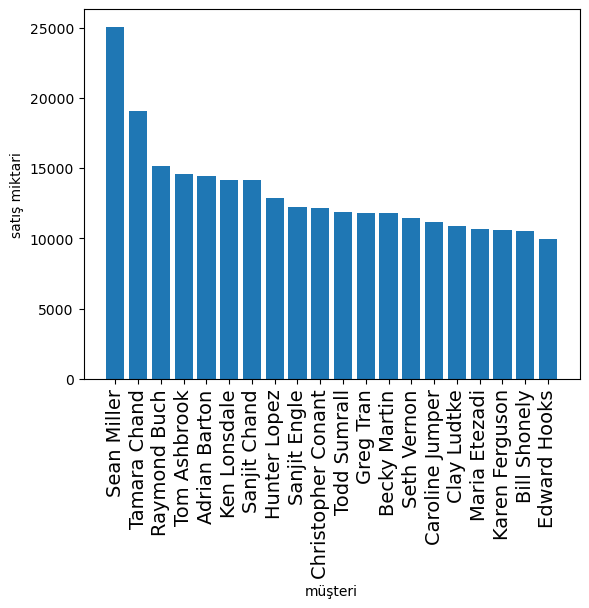

In [259]:

#en çok  görselleştirmek için
plt.bar(customer_df["Customer Name"],customer_df["Sales"])
#daha düzenli için
plt.xlabel("müşteri")
plt.ylabel("satış miktari")
plt.xticks(fontsize=14, rotation=90) #daha düzenli sıralamak için
plt.show()

In [273]:
#katogeri üzerinden satışlara bakmak için
category=df.groupby("Category").sum(numeric_only=True)
category

,Postal Code,Sales,Year
Category,,,
Furniture,115548447.0,728658.5757,4190735
Office Supplies,324887447.0,705422.3340,11916829
Technology,100694081.0,827455.8730,3656333


In [275]:
#gereksiz verileri silmek için
category=df.groupby("Category").sum(numeric_only=True)
category.drop(["Postal Code","Year"], axis=1, inplace=True)
category

,Sales
Category,
Furniture,728658.5757
Office Supplies,705422.3340
Technology,827455.8730


In [277]:
category.reset_index(inplace=True)
category

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


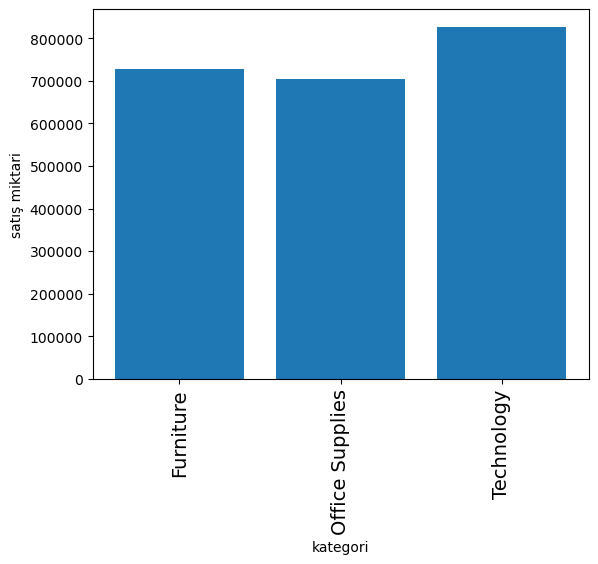

In [281]:
#en çok  görselleştirmek için
plt.bar(category["Category"],category["Sales"])
#daha düzenli için
plt.xlabel("kategori")
plt.ylabel("satış miktari")
plt.xticks(fontsize=14, rotation=90) #daha düzenli sıralamak için
plt.show()

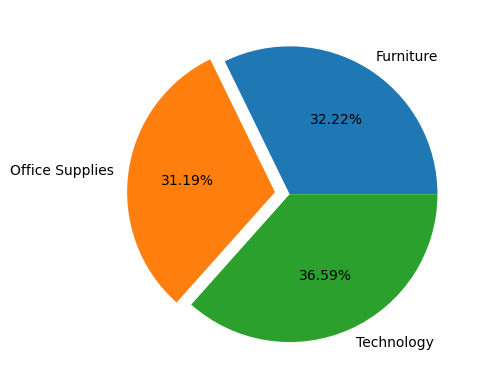

In [293]:
#pasta grafiği için
plt.pie(category["Sales"], labels=category["Category"], autopct="%0.2f%%",explode=[0,0.1,0] ) #autopct pasta grafiğinde yüzdelik dilimi gösterir
#explode ise pasta grafiğinde aradaki uzaklık mesafesini ayarlar

plt.show()  #gereksiz yazıları göstermez